# Pivot & Melt
-----------
Funciones para cambiar la estructura del DF
### Pivot table
Transforma los valores de determinadas columnas o filas en los indices de un nuevo DF y la intersección es el valor resultante.

Pivot
Un parámetro intenresante de esta función es el fill_value: el cual nos permitirá determinar con que contenido queremos visualizar los valores NaN, para este ejemplo uso el caracter " - " 

In [2]:
#Importando pandas
import pandas as pd

In [3]:
#Cargando un dataframe
df_books = pd.read_csv('dataset/bestsellers.csv',sep=',',header=0)

In [4]:
#Leyendo el dataframe
df_books.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [5]:
#Aplicando pivot table
df_books.pivot_table(index='Author', columns='Genre', values='User Rating')


Genre,Fiction,Non Fiction
Author,,
Abraham Verghese,4.6,NaN
Adam Gasiewski,NaN,4.400000
Adam Mansbach,4.8,NaN
Adir Levy,4.8,NaN
Admiral William H. McRaven,NaN,4.700000
...,...,...
Walter Isaacson,NaN,4.566667
William Davis,NaN,4.400000
William P. Young,4.6,NaN


Como se puede observar en la tabla anterior:
----------------------------------------

+ `index='Author'`: Nos indica que el encabezado de indices le corresponden a `Author`, es decir veremos un Autor en cada entrada de fila.
  
+ `columns='Genre'`: Nos indica que el encabezado de columnas le corresponde a `Genre`, es decir veremos tantas columnas como `géneros literarios`.
  
+ `values='User Rating'`: Nos indica que el valor de las intersecciones, serán `User Rating`, así nos encontraremos los valores correspondientes.

In [9]:
#Encontrando otros usos para pivot
df_books.pivot_table(index='Genre',columns='Year',values='User Rating',aggfunc='mean')

Year,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Genre,,,,,,,,,,,
Fiction,4.591667,4.615,4.619048,4.495238,4.545833,4.631034,4.652941,4.715789,4.737500,4.738095,4.820000
Non Fiction,4.576923,4.520,4.513793,4.558621,4.561538,4.609524,4.645455,4.654839,4.588462,4.617241,4.686667


# Explicacion
--------------------------
Por cada género tenemos el promedio `mean` **[aggfunc]** de las valoraciones de usuario `User Rating` **[values]** géneros literarios `Genre` **[index]** según los años `Year` **[columns]**.

#### OJO: 
* aggfunc: Es la funcón de agrupamiento y nos permite obtener:
    * sum: Suma
    * mean: Promedio
    * median: Mediana
    * std: Desviación Standard
    * count: Conteo
    * var: Varianza

# Melt
----------
Este método toma las columnas del Data Frame y las pasa a las filas, con dos nuevas columnas para especificar la columna antigua y el valor que tenía.

Por ejemplo al imprimir las 5 primeras filas del DF con las columnas de `Name` y `Genre` se tiene este resultado.





In [11]:
df_books[['Name','Genre']].head(5)

,Name,Genre
0,10-Day Green Smoothie Cleanse,Non Fiction
1,11/22/63: A Novel,Fiction
2,12 Rules for Life: An Antidote to Chaos,Non Fiction
3,1984 (Signet Classics),Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",Non Fiction


In [12]:
#aplicando Melt
df_books[['Name','Genre']].head(5).melt()

,variable,value
0,Name,10-Day Green Smoothie Cleanse
1,Name,11/22/63: A Novel
2,Name,12 Rules for Life: An Antidote to Chaos
3,Name,1984 (Signet Classics)
4,Name,"5,000 Awesome Facts (About Everything!) (Natio..."
5,Genre,Non Fiction
6,Genre,Fiction
7,Genre,Non Fiction
8,Genre,Fiction
9,Genre,Non Fiction


Ahora cada resultado de las 2 columnas pasa a una fila y de este modo a tipo:

**llave:valor**

In [13]:
df_books.melt(id_vars='Year',value_vars='Genre')

,Year,variable,value
0,2016,Genre,Non Fiction
1,2011,Genre,Fiction
2,2018,Genre,Non Fiction
3,2017,Genre,Fiction
4,2019,Genre,Non Fiction
...,...,...,...
545,2019,Genre,Fiction
546,2016,Genre,Non Fiction
547,2017,Genre,Non Fiction
548,2018,Genre,Non Fiction


# Explicación:
---------------
Simplemente podemos seleccionar las columnas que no le quiero hacer `melt()` usando el parametro `id_vars=`. Y para el caso de aplicar el `melt()` uso el parametro `value_vars=`.
### Resumen:
* ``id_vars``: sin `melt()`
* `value_vars`: con `melt()`

In [15]:
#Otro ejemplo
df_books.melt(id_vars=['Name','Year'],value_vars=['Author','Genre'])

,Name,Year,variable,value
0,10-Day Green Smoothie Cleanse,2016,Author,JJ Smith
1,11/22/63: A Novel,2011,Author,Stephen King
2,12 Rules for Life: An Antidote to Chaos,2018,Author,Jordan B. Peterson
3,1984 (Signet Classics),2017,Author,George Orwell
4,"5,000 Awesome Facts (About Everything!) (Natio...",2019,Author,National Geographic Kids
...,...,...,...,...
1095,Wrecking Ball (Diary of a Wimpy Kid Book 14),2019,Genre,Fiction
1096,You Are a Badass: How to Stop Doubting Your Gr...,2016,Genre,Non Fiction
1097,You Are a Badass: How to Stop Doubting Your Gr...,2017,Genre,Non Fiction
1098,You Are a Badass: How to Stop Doubting Your Gr...,2018,Genre,Non Fiction


In [18]:
#Veamos las primeras 5 entradas para Author - valor
df_meltoso = df_books.melt(id_vars=['Name','Year'],value_vars=['Author','Genre'])
#Observando las 5 primeras entradas de Author
df_meltoso.head(5)

,Name,Year,variable,value
0,10-Day Green Smoothie Cleanse,2016,Author,JJ Smith
1,11/22/63: A Novel,2011,Author,Stephen King
2,12 Rules for Life: An Antidote to Chaos,2018,Author,Jordan B. Peterson
3,1984 (Signet Classics),2017,Author,George Orwell
4,"5,000 Awesome Facts (About Everything!) (Natio...",2019,Author,National Geographic Kids


In [20]:
#Observando las 5 primeras entradas de Genre
df_meltoso.iloc[550:556]

,Name,Year,variable,value
550,10-Day Green Smoothie Cleanse,2016,Genre,Non Fiction
551,11/22/63: A Novel,2011,Genre,Fiction
552,12 Rules for Life: An Antidote to Chaos,2018,Genre,Non Fiction
553,1984 (Signet Classics),2017,Genre,Fiction
554,"5,000 Awesome Facts (About Everything!) (Natio...",2019,Genre,Non Fiction
555,A Dance with Dragons (A Song of Ice and Fire),2011,Genre,Fiction


# IMPORTANTE:
Debido a que crea una copia del DF por cada variable, 
en realidad `df_meltoso` contiene 1100 entradas,
y por eso hice una slicing, para que se pudieran ver
las 5 primeras entradas de cada variable

Este es un ejemplo de cómo suelo usar ``melt()`` Digamos que tengo una tabla con los locales (filas) y las ventas anuales (cols). Y quiero como resultado - tener 3 cols con Local, Año y Ventas.

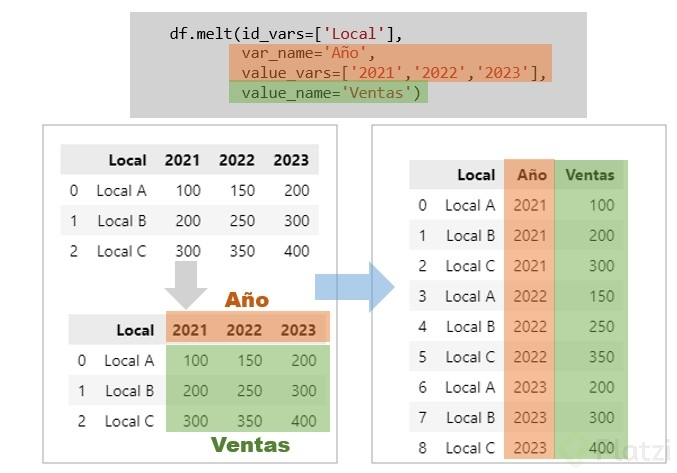

# Codigo
```python
import pandas as pd
data = {
    'Local': ['Local A', 'Local B', 'Local C'],
    #Ventas por año
    '2021': [100, 200, 300],
    '2022': [150, 250, 350],
    '2023': [200, 300, 400]
}
df = pd.DataFrame(data)
```
**Luego convertimos a las 3 cols:**
```python
df.melt(id_vars=['Local'],
        var_name='Año',
        value_vars=['2021','2022','2023'],
        value_name='Ventas')
```